# Testing Balanced Not-Random Network

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
degree=20
netsize=1000
k=2
interface_dim=350

In [3]:
density=degree/netsize
randomnetwork=np.zeros((netsize,netsize))
for row in range(netsize):
    if (row%3==0): 
        for i in range(degree):
            randomnetwork[row,row-i]=-1
    else:
        for i in range(degree):
            randomnetwork[row,row-i]=1/2

In [4]:
randomnetwork

array([[-1. ,  0. ,  0. , ..., -1. , -1. , -1. ],
       [ 0.5,  0.5,  0. , ...,  0.5,  0.5,  0.5],
       [ 0.5,  0.5,  0.5, ...,  0.5,  0.5,  0.5],
       ...,
       [ 0. ,  0. ,  0. , ...,  0.5,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0.5,  0.5,  0. ],
       [ 0. ,  0. ,  0. , ..., -1. , -1. , -1. ]])

## One shock in time

In [13]:
interface=np.zeros(interface_dim)
for i in range(interface_dim):
    r=tf.random.uniform(shape=[],minval=0,maxval=1)
    interface[i]=r

In [14]:
interface

array([0.54567575, 0.44694543, 0.33178723, 0.52518594, 0.77256012,
       0.74225521, 0.37002814, 0.42774487, 0.49610317, 0.43546009,
       0.25355458, 0.90234661, 0.49261236, 0.04048777, 0.08756006,
       0.59558904, 0.97481608, 0.52477229, 0.10884154, 0.60098112,
       0.54077697, 0.97492671, 0.0276202 , 0.50281894, 0.72892821,
       0.83882916, 0.93763435, 0.10525215, 0.26135445, 0.22655976,
       0.01054811, 0.11278665, 0.8373369 , 0.37357795, 0.03640246,
       0.79882598, 0.34443414, 0.99300122, 0.94712973, 0.31514001,
       0.00950277, 0.67023933, 0.54645538, 0.18065035, 0.32588804,
       0.61279058, 0.77336931, 0.38523471, 0.57857108, 0.34602225,
       0.06235754, 0.54249477, 0.071154  , 0.02879822, 0.33837378,
       0.82290673, 0.38413489, 0.44802988, 0.94592524, 0.61279273,
       0.74709487, 0.21457982, 0.9804076 , 0.79665911, 0.03176808,
       0.15610349, 0.61594927, 0.18371046, 0.9334836 , 0.72501576,
       0.17359746, 0.97227347, 0.13158512, 0.2604661 , 0.93578

In [15]:
time=10
#Initialized!
temp=np.zeros((time,netsize))

In [16]:
for i in range(interface_dim):
   temp[0,i]=interface[i]

#update fire states
for t in range(time):
    if t<time-1:
        for i in range(netsize):
            
            s= np.dot(temp[t],randomnetwork[i])*1/12 #forget_rate=1/12
            if s>0:
                 temp[t+1,i]=s
            else:
                 temp[t+1,i]=0

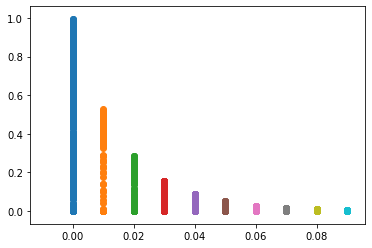

In [17]:
y=np.zeros(netsize)
for t in range(time):
    plt.scatter(y,temp[t])
    y=y+0.01

In [18]:
for i in range(time):
    print(max(temp[i])*100)

99.57513809204102
52.93688327074051
28.319456117848556
15.746184986050208
8.752115543272037
4.890042650525029
2.7439763962498063
1.5383320608798865
0.8619211260854807
0.4827777285460429


In [19]:
max(temp[8])

0.008619211260854806

In [20]:
x=[-1, 2, 3, -4]

In [21]:
abs(x[1])

2

In [22]:
print(tf.nn.relu6([1,2, 10]))

tf.Tensor([1 2 6], shape=(3,), dtype=int32)


## Stability in Long Period of Time and Multiple Shocks...

In [23]:
time=100
#Initialized!
temp=np.zeros((time,netsize))

In [24]:
for i in range(interface_dim):
   temp[0,i]=interface[i]

#update fire states

temp2=np.zeros(netsize)
for t in range(time):
    if t<time-1:
        interface=np.zeros(interface_dim)
        for i in range(interface_dim):
            r=tf.random.uniform(shape=[],minval=0,maxval=1)
            interface[i]=r
                
        for i in range(interface_dim):
            temp2[i]=temp[t,i]+interface[i]
            
        for i in range(netsize):
            s=np.dot(temp2,randomnetwork[i])*1/12 #forget_rate=1/12
            if s>0:
                temp[t+1,i]=s
            else:
                temp[t+1,i]=0
        
        #changing size
        for i in range(interface_dim):
            interface[i]=temp[t+1,i]


In [25]:
y=np.zeros(netsize)

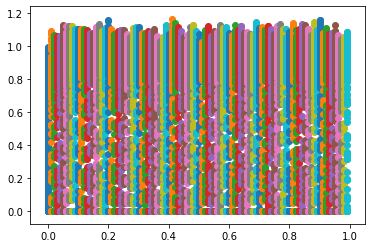

In [26]:
for t in range(time):
    plt.scatter(y,temp[t])
    y=y+0.01

In [27]:
np.max(temp[8:40])

1.1626747775287891

In [28]:
for i in range(8):
    a=a+(3.3*1/4)